In [1]:
import os
import sys
import shutil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import region_formatter, path_utils

In [4]:
pathUtils = path_utils.PathUtils()

In [5]:
fig_plots = []

In [6]:
git_root_path = pathUtils.get_git_root(os.getcwd())
dataframes_path = "{}/dataframes".format(git_root_path)

In [7]:
%run ../dataframes/provinces_gdf.ipynb -i
provinces_gdf = pd.read_pickle("{}/provinces_gdf.pkl".format(dataframes_path))

In [8]:
%run ../dataframes/asl.ipynb -i
df_asl = pd.read_pickle("{}/df_asl.pkl".format(dataframes_path))

In [9]:
%run ../dataframes/dism_first_access.ipynb -i
df_dism_first_access = pd.read_pickle("{}/df_dism_first_access.pkl".format(dataframes_path))

In [10]:
%run ../datasets/dism_provincia_mapper.ipynb -i

In [11]:
newcmp = LinearSegmentedColormap.from_list("", ["#a3b18a", "#588157","#3a5a40"])

In [12]:
### Constants
OUTPUT_DIR = "output"
TARGET_GROUP = "Demenze e disturbi mentali organici"
TARGET_GROUP_TEXT = "Demenze e disturbi mentali organici"
YEAR = "2022"
# CMAP = (ListedColormap(['cyan', 'yellow', 'orange']))
CMAP = newcmp

In [13]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

In [14]:
REGION_COLOURS = {
    "Nord": "#344e41", 
    "Centro": "#588157",
    "Sud e Isole": "#dad7cd",
}

In [15]:
if not os.path.exists(OUTPUT_DIR):
    # Create the directory
    os.makedirs(OUTPUT_DIR)

In [16]:
folder = OUTPUT_DIR
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

# prepare dataframe

In [17]:
df = df_dism_first_access.loc[df_dism_first_access["gruppo_diagnostico"] == TARGET_GROUP, [
    "codice_asl", 
    "descrizione_regione",
    "sesso",
    "numero_accessi",
    "asl"
]]

In [18]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,asl
3,203,PIEMONTE,Maschio,126,to3
14,203,PIEMONTE,Femmina,125,to3
25,204,PIEMONTE,Maschio,189,to4
36,204,PIEMONTE,Femmina,112,to4
47,205,PIEMONTE,Maschio,99,to5
...,...,...,...,...,...
2864,305,SARDEGNA,Femmina,5,asl n. 5 di oristano
2874,306,SARDEGNA,Maschio,13,asl n. 6 del medio campidano
2883,306,SARDEGNA,Femmina,11,asl n. 6 del medio campidano
2893,308,SARDEGNA,Maschio,72,asl n. 8 di cagliari


In [19]:
df_asl

,anno,codice_regione,denominazione_regione,codice_azienda,denominazione_azienda,indirizzo,cap,comune,sigla_provincia,telefono,fax,e-mail,sito_web,partita_iva,denominazione_azienda_compatibile
0,2010,10,PIEMONTE,201,to1,VIA S.SECONDO 29,10128,TORINO,TO,NaN,NaN,NaN,NaN,NaN,asl citta' di torino
1,2010,10,PIEMONTE,202,to2,CORSO SVIZZERA 164,10149,TORINO,TO,NaN,NaN,NaN,NaN,NaN,asl citta' di torino
2,2010,10,PIEMONTE,203,to3,VIA MARTIRI XXX APRILE 30,10093,COLLEGNO,TO,NaN,NaN,NaN,NaN,NaN,to3
3,2010,10,PIEMONTE,204,to4,Via Po 11,10034,CHIVASSO,TO,NaN,NaN,NaN,NaN,NaN,to4
4,2010,10,PIEMONTE,205,to5,VIA SAN DOMENICO 21,10023,CHIERI,TO,NaN,NaN,NaN,NaN,NaN,to5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2024,200,SARDEGNA,304,asl n. 4 dell'ogliastra,VIA PISCINAS 1,8045,LANUSEI,NU,NaN,NaN,direzione.generale@aslogliastra.it,www.aslogliastra.it,1.620421e+09,asl n. 4 dell'ogliastra
1802,2024,200,SARDEGNA,305,asl n. 5 di oristano,VIA CARDUCCI 35,9170,ORISTANO,OR,NaN,NaN,direzione.generale@asloristano.it,nuovo.asloristano.it/a,1.258181e+09,asl n. 5 di oristano
1803,2024,200,SARDEGNA,306,asl n. 6 del medio campidano,VIA GIUSEPPE UNGARETTI 9,9025,SANLURI,SU,07093841,07093841,direzione.generale@aslmediocampidano.it,www.aslmediocampidano.it,3.990321e+09,asl n. 6 del medio campidano
1804,2024,200,SARDEGNA,307,asl n. 7 del sulcis,VIA DALMAZIA 83,9013,CARBONIA,SU,07816681,07816681,direzione.generale@aslsulcis.it,www.aslsulcis.it,3.990311e+09,asl n. 7 del sulcis


In [20]:
df_asl = df_asl[["anno", "comune", "codice_azienda", "sigla_provincia", "denominazione_azienda_compatibile"]]

In [21]:
df_asl = df_asl.groupby(['denominazione_azienda_compatibile', "comune", "sigla_provincia"])['anno'].max().reset_index()

In [22]:
df_asl

,denominazione_azienda_compatibile,comune,sigla_provincia,anno
0,a.s.l. avellino,AVELLINO,AV,2024
1,a.s.l. benevento,BENEVENTO,BN,2024
2,a.s.l. caserta,CASERTA,CE,2024
3,a.s.l. napoli 1 centro,NAPOLI,NA,2024
4,a.s.l. napoli 2 nord,FRATTAMAGGIORE,NA,2024
...,...,...,...,...
161,to5,CHIERI,TO,2024
162,trento,TRENTO,TN,2024
163,vc,VERCELLI,VC,2024
164,vco,OMEGNA,VB,2024


In [23]:
provinces_gdf = provinces_gdf[["prov_acr", "geometry", "zone", "prov_name"]]

In [24]:
df_incompatible_names = df.set_index("asl").join(df_asl.set_index("denominazione_azienda_compatibile"), how="right").reset_index()

In [25]:
missing_asl_mask = df_incompatible_names.numero_accessi.isna()

In [26]:
df_incompatible_names.loc[missing_asl_mask, ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
50,asl n. 2 della gallura,NaN,NaN,NaN,NaN,OLBIA,OT,2016
51,asl n. 2 della gallura,NaN,NaN,NaN,NaN,OLBIA,SS,2024
64,asl n. 7 del sulcis,NaN,NaN,NaN,NaN,CARBONIA,SU,2024
81,asp messina,NaN,NaN,NaN,NaN,MESSINA,ME,2024
188,ats della montagna,NaN,NaN,NaN,NaN,SONDRIO,SO,2024
190,ats di bergamo,NaN,NaN,NaN,NaN,BERGAMO,BG,2024
191,ats di brescia,NaN,NaN,NaN,NaN,BRESCIA,BS,2024
325,carbonia,NaN,NaN,NaN,NaN,CARBONIA,CI,2016
326,carbonia,NaN,NaN,NaN,NaN,IGLESIAS,CI,2010


In [27]:
df = df.set_index("asl").join(df_asl.set_index("denominazione_azienda_compatibile"))

In [28]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
asl,,,,,,,
to3,203,PIEMONTE,Maschio,126,COLLEGNO,TO,2024.0
to3,203,PIEMONTE,Femmina,125,COLLEGNO,TO,2024.0
to4,204,PIEMONTE,Maschio,189,CHIVASSO,TO,2024.0
to4,204,PIEMONTE,Femmina,112,CHIVASSO,TO,2024.0
to5,205,PIEMONTE,Maschio,99,CHIERI,TO,2024.0
...,...,...,...,...,...,...,...
asl n. 6 del medio campidano,306,SARDEGNA,Femmina,11,SANLURI,VS,2016.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,72,CAGLIARI,CA,2024.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,72,SELARGIUS,CA,2022.0


In [29]:
df = df.reset_index()

In [30]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [31]:
df.loc[missing_mask_sigla_provincia,]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
42,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Maschio,188,NaN,NaN,NaN
43,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Femmina,195,NaN,NaN,NaN
44,asst santi paolo e carlo,702,LOMBARDIA,Maschio,166,NaN,NaN,NaN
45,asst santi paolo e carlo,702,LOMBARDIA,Femmina,91,NaN,NaN,NaN
46,asst fatebenefratelli sacco,703,LOMBARDIA,Maschio,150,NaN,NaN,NaN
47,asst fatebenefratelli sacco,703,LOMBARDIA,Femmina,173,NaN,NaN,NaN
48,asst ovest milanese,705,LOMBARDIA,Maschio,60,NaN,NaN,NaN
49,asst ovest milanese,705,LOMBARDIA,Femmina,72,NaN,NaN,NaN
50,asst rhodense,706,LOMBARDIA,Maschio,160,NaN,NaN,NaN
51,asst rhodense,706,LOMBARDIA,Femmina,52,NaN,NaN,NaN


In [32]:
df.loc[missing_mask_sigla_provincia, 'sigla_provincia'] = df.loc[missing_mask_sigla_provincia, 'asl'].str.lower().map(dism_provincia_map)


In [33]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [34]:
df.loc[missing_mask_sigla_provincia, ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno


In [35]:
df_dism_agg = df.reset_index()[["asl", "sigla_provincia"]].pivot_table(
    index='sigla_provincia',
    aggfunc='count',
)

In [36]:
df_dism_agg

,asl
sigla_provincia,
AG,2
AL,4
AN,10
AO,2
AP,10
...,...
VI,8
VR,7
VS,2


In [37]:
df_dism_agg = df_dism_agg.rename(columns={
    "asl": "dism_count",
})

In [38]:
df_dism_agg.filter(items=['LI'], axis=0)

,dism_count
LI,2


In [39]:
df = df.reset_index()

In [40]:
df = df.pivot_table(
    index='sigla_provincia',
    aggfunc='sum',
    values='numero_accessi'
)

In [41]:
df

,numero_accessi
sigla_provincia,
AG,3181
AL,518
AN,1109
AO,56
AP,1109
...,...
VI,1168
VR,1102
VS,24


In [42]:
df = df.join(df_dism_agg)

In [43]:
df = df.assign(target_group_avg=lambda df_: df_.numero_accessi / df_.dism_count)

In [44]:
df

,numero_accessi,dism_count,target_group_avg
sigla_provincia,,,
AG,3181,2,1590.500000
AL,518,4,129.500000
AN,1109,10,110.900000
AO,56,2,28.000000
AP,1109,10,110.900000
...,...,...,...
VI,1168,8,146.000000
VR,1102,7,157.428571
VS,24,2,12.000000


In [45]:
df = provinces_gdf.set_index("prov_acr").join(df)

In [46]:
df

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
TO,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",Nord,Torino,1685.0,8.0,210.625
VC,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",Nord,Vercelli,135.0,2.0,67.500
NO,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",Nord,Novara,255.0,2.0,127.500
CN,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",Nord,Cuneo,770.0,4.0,192.500
AT,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",Nord,Asti,147.0,2.0,73.500
...,...,...,...,...,...,...
SS,"MULTIPOLYGON (((9.46502 40.65584, 9.46475 40.6...",Sud e Isole,Sassari,32.0,2.0,16.000
NU,"MULTIPOLYGON (((9.28037 39.91741, 9.27741 39.9...",Sud e Isole,Nuoro,42.0,4.0,10.500
CA,"MULTIPOLYGON (((8.84872 39.09924, 8.84697 39.1...",Sud e Isole,Cagliari,344.0,4.0,86.000


In [47]:
plot_title = "Totale accessi con diagnosi '{}'\n per DSM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

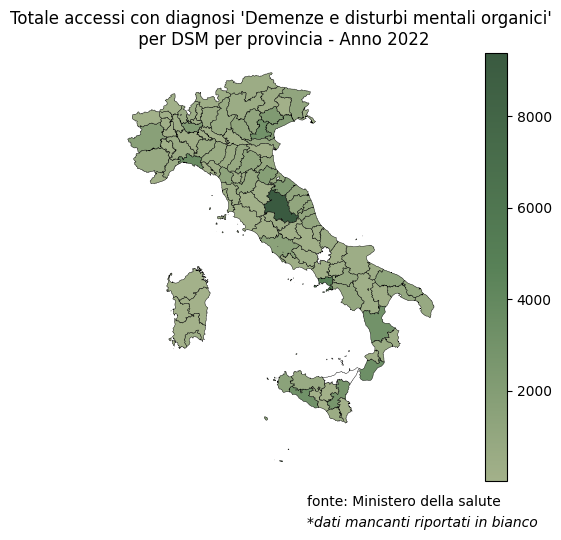

In [48]:
df_plot = df.plot(
    column="numero_accessi",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('*dati mancanti riportati in bianco', (0,0), (140, -25), xycoords='axes fraction', textcoords='offset points', va='top', style='italic')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

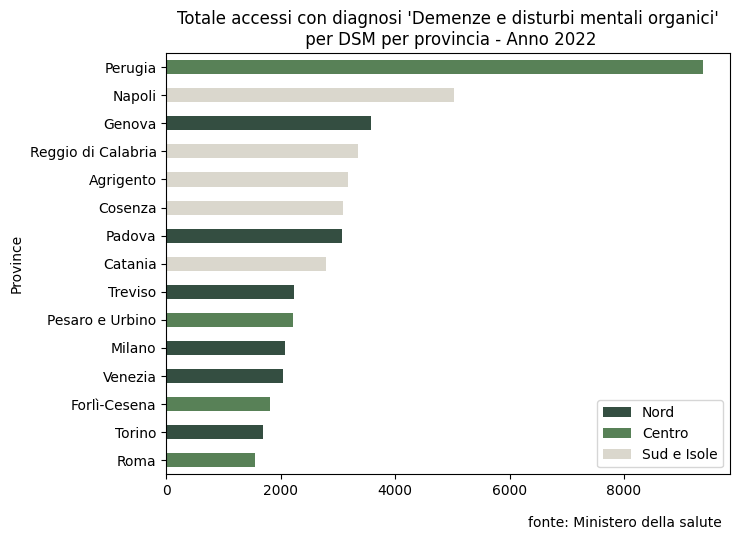

In [49]:
best_rows = df.sort_values(by=['numero_accessi'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['numero_accessi'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    y="numero_accessi",
    x="prov_name",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

In [50]:
best_rows

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
PG,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro,Perugia,9384.0,8.0,1173.000000
NA,"MULTIPOLYGON (((14.35567 41.00178, 14.35628 41...",Sud e Isole,Napoli,5032.0,10.0,503.200000
GE,"MULTIPOLYGON (((8.62924 44.43798, 8.63001 44.4...",Nord,Genova,3575.0,4.0,893.750000
RC,"POLYGON ((16.14846 38.05694, 16.14312 38.04365...",Sud e Isole,Reggio di Calabria,3350.0,4.0,837.500000
AG,"MULTIPOLYGON (((13.66344 37.19338, 13.66190 37...",Sud e Isole,Agrigento,3181.0,2.0,1590.500000
CS,"MULTIPOLYGON (((15.97395 39.46742, 15.97243 39...",Sud e Isole,Cosenza,3079.0,2.0,1539.500000
PD,"POLYGON ((11.98296 45.16275, 11.98343 45.15557...",Nord,Padova,3072.0,10.0,307.200000
CT,"MULTIPOLYGON (((15.16620 37.55927, 15.16576 37...",Sud e Isole,Catania,2794.0,2.0,1397.000000
TV,"POLYGON ((11.80324 45.79994, 11.79414 45.79929...",Nord,Treviso,2235.0,6.0,372.500000


In [51]:
plot_title = "Media accessi con diagnosi '{}'\n per DSM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

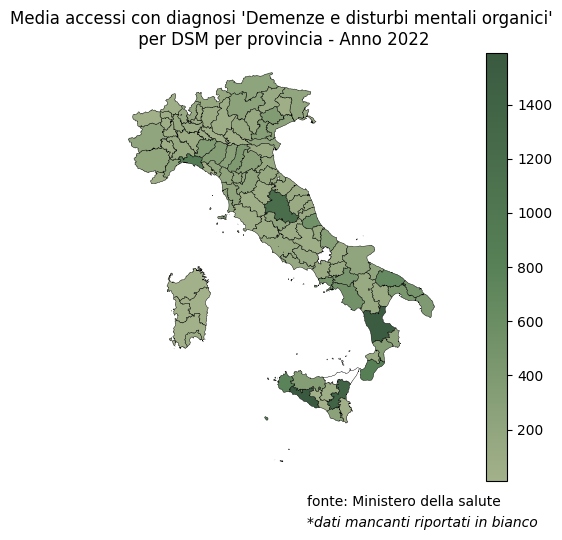

In [52]:
df_plot = df.plot(
    column="target_group_avg",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('*dati mancanti riportati in bianco', (0,0), (140, -25), xycoords='axes fraction', textcoords='offset points', va='top', style='italic')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

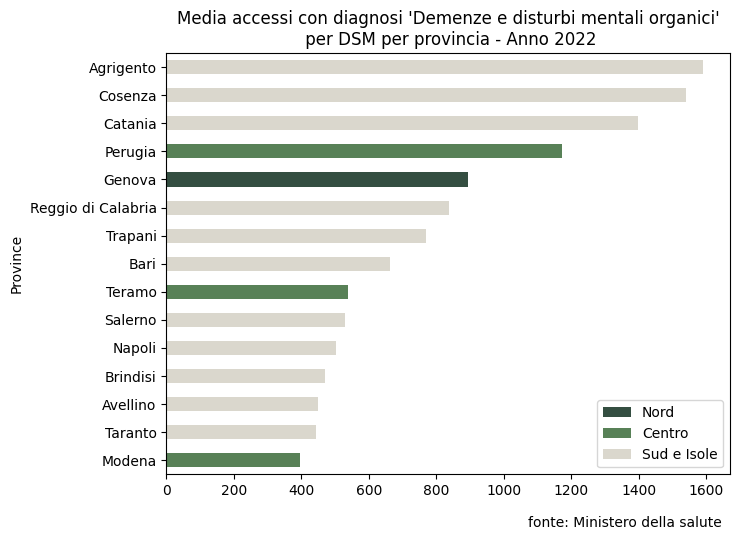

In [53]:
best_rows = df.sort_values(by=['target_group_avg'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['target_group_avg'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="target_group_avg",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

In [54]:
plot_title = "Numero di DSM per provincia - Anno {}".format(
    YEAR
)

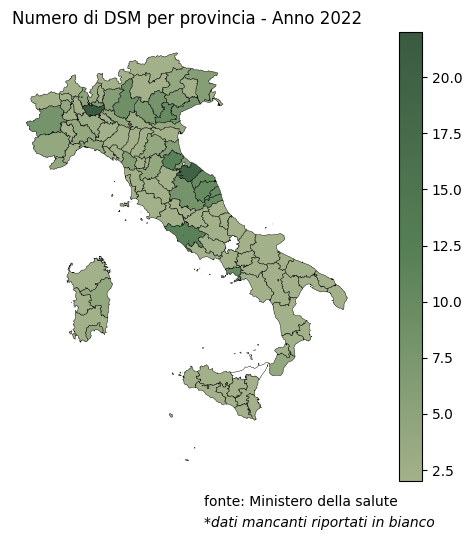

In [55]:
df_plot = df.plot(
    column="dism_count",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('*dati mancanti riportati in bianco', (0,0), (140, -25), xycoords='axes fraction', textcoords='offset points', va='top', style='italic')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

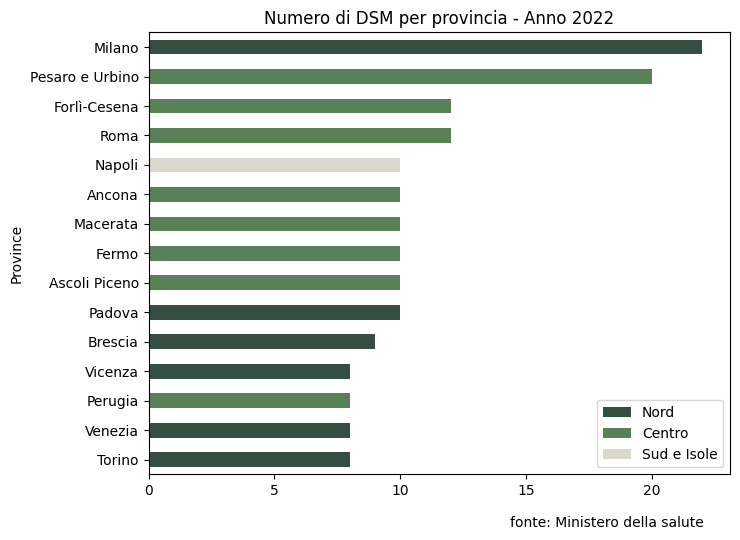

In [56]:
best_rows = df.sort_values(by=['dism_count'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['dism_count'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="dism_count",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

In [57]:
for i, fig_plot in enumerate(fig_plots, start=1):
    df_ = fig_plot.get("df")
    df_name = fig_plot.get("name")
    file_name = "{}/{}_{}.png".format(OUTPUT_DIR, i, df_name)
    df_.get_figure().savefig(file_name)